In [2]:
from importlib import reload
import networkx as nx
from neighborhooditerator import NeighborhoodIterator
import progressbar
import thesispipeline
reload(thesispipeline)
ThesisPipeline = thesispipeline.ThesisPipeline

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [3]:
thesis = ThesisPipeline()
thesis.load_data()
thesis.remove_interior_nodes()

In [4]:
neighborhoodlen = []
dist = 3
for graph in progressbar.ProgressBar()(thesis.graphs, max_value=len(thesis.graphs)):
    for node in graph.nodes:
        neighborhoodlen.append(len(NeighborhoodIterator._get_neighborhood_nodes(None, graph, node, dist)))

100% (1228 of 1228) |####################| Elapsed Time: 0:00:31 Time:  0:00:31


In [5]:
len(neighborhoodlen)

399781

Text(0, 0.5, '% of neighborhoods')

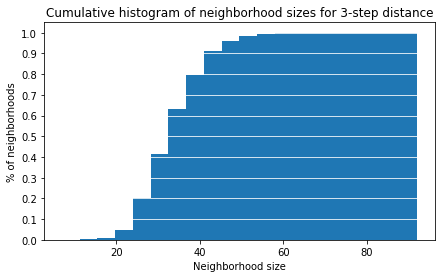

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from matplotlib import pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(neighborhoodlen, cumulative=True, density=True, bins=20)
plt.grid(axis="y", color="white")
plt.yticks([i/10 for i in range(11)])
plt.title("Cumulative histogram of neighborhood sizes for 3-step distance")
plt.xlabel("Neighborhood size")
plt.ylabel("% of neighborhoods")

In [3]:
from gcn.gcn import Laplacian

In [4]:
laplacian_sizes = []
dist = 3
for graph in progressbar.ProgressBar()(thesis.graphs, max_value=len(thesis.graphs)):
    for node in graph.nodes:
        neighbors = NeighborhoodIterator._get_neighborhood_nodes(None, graph, node, dist)
        if len(neighbors) < 150:
            H = graph.subgraph(neighbors)
            L = Laplacian.from_adjacency(nx.adjacency_matrix(H)) # coo matrix
            laplacian_sizes.append(L.data.nbytes + L.row.nbytes + L.col.nbytes)

100% (1228 of 1228) |####################| Elapsed Time: 1:24:55 Time:  1:24:55


In [1]:
[1,2,3].pop()

3

Text(0, 0.5, '% of neighborhoods')

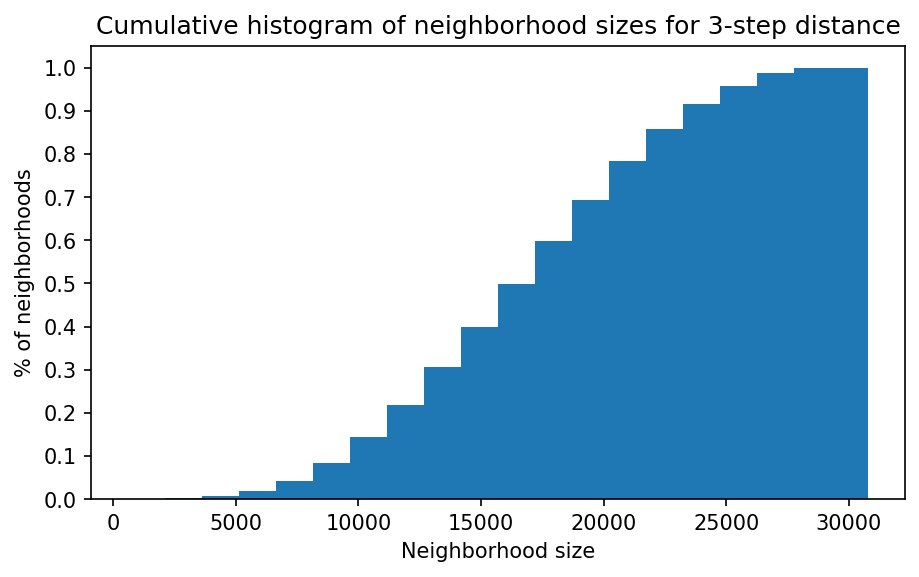

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from matplotlib import pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(laplacian_sizes, cumulative=True, density=True, bins=20)
#plt.grid(axis="y", color="white")
plt.yticks([i/10 for i in range(11)])
plt.title("Cumulative histogram of neighborhood sizes for 3-step distance")
plt.xlabel("Neighborhood size")
plt.ylabel("% of neighborhoods")

In [11]:
sum(laplacian_sizes)/(1024*1024*1024)

16.073427245020866

In [8]:
sum([s for s in laplacian_sizes if s < 20000])/(1024*1024*1024)

9.114348098635674